In [31]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
# Load the dataset
df = pd.read_csv('Housing.csv')

In [33]:
# Preview the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())

First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 e

In [34]:
# Step 1: Convert binary categorical columns to numeric
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [35]:
# Step 2: One-hot encode the multi-category column 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [36]:
# Step 3: Define independent and dependent variables
X_multi = df.drop('price', axis=1)
y = df['price']

In [37]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

In [38]:
# Step 5: Train the Multiple Linear Regression model
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

LinearRegression()

In [39]:
# Step 6: Predict using the model
y_pred_multi = model_multi.predict(X_test)

In [40]:
# Step 7: Evaluate the model
print("\nModel Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_multi))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_multi))
print("R² Score:", r2_score(y_test, y_pred_multi))



Model Evaluation Metrics:
Mean Absolute Error (MAE): 970043.403920164
Mean Squared Error (MSE): 1754318687330.664
R² Score: 0.6529242642153184


In [41]:
# Step 8: Display feature coefficients
coeff_df = pd.DataFrame(model_multi.coef_, index=X_multi.columns, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coeff_df)


Feature Coefficients:
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
mainroad                         3.679199e+05
guestroom                        2.316100e+05
basement                         3.902512e+05
hotwaterheating                  6.846499e+05
airconditioning                  7.914267e+05
parking                          2.248419e+05
prefarea                         6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


In [42]:
# Create a new model using only 'area' for visualization
model_area = LinearRegression()
X_area = df[['area']]
y_price = df['price']
model_area.fit(X_area, y_price)

LinearRegression()

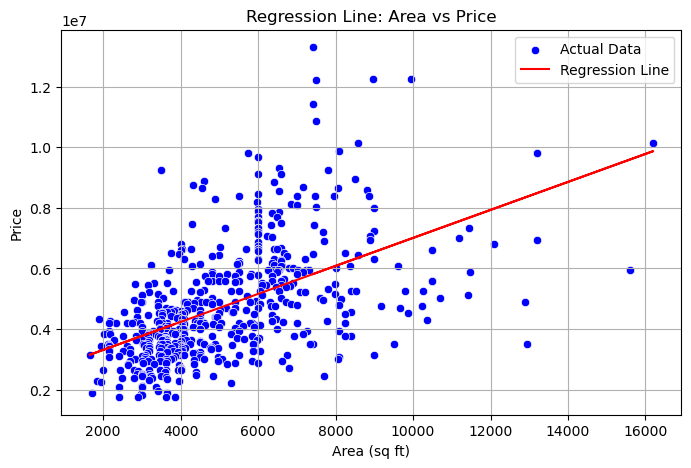

In [43]:
# Plot data
plt.figure(figsize=(8, 5))
sns.scatterplot(x='area', y='price', data=df, color='blue', label='Actual Data')
plt.plot(df['area'], model_area.predict(X_area), color='red', label='Regression Line')
plt.title('Regression Line: Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Interpretation
print(f"\nIntercept: {model_area.intercept_:.2f}")
print(f"Coefficient for area: {model_area.coef_[0]:.2f}")
print("Interpretation: For every additional square foot of area, the price increases by approximately",
      f"{model_area.coef_[0]:.2f} units (currency not specified in dataset).")


Intercept: 2387308.48
Coefficient for area: 461.97
Interpretation: For every additional square foot of area, the price increases by approximately 461.97 units (currency not specified in dataset).
